###**학습 목표**

- 이미지를 분류할 때 이미 잘 학습된 모델을 사용한다는 아이디어를 떠올릴 수 있다.
- 사전학습 모델인 Backbone 모델의 종류와 개념을 알고, Transfer Learning의 개념을 설명할 수 있다.
- VGG, ResNet과 같은 기본적인 Backbone 모델을 불러와서 사용할 수 있다.

ILSVRC(ImageNet Large Scale Visual Recognition Challenge) : 이미지 분류 대회

ImageNet : 데이터셋

#**Transfer Learning(전이학습)**

###1. 전이학습에 대하여
- 사전학습 된 모델(pre-trained model)을 이용하는 것

###2. CNN, 합성곱 신경망
전이학습의 몇몇 사전 학습 모델들은 합성곱 신경망(CNN) 구조를 가짐. 컴퓨터 비전 문제에서 뛰어난 성능 가짐.

- Convolutional base
  - 합성곱층, 풀링층의 여러겹으로 이루어짐
  - 이미지 특징을 효과적으로 추출하는 것이 목표 (Feature Extraction)
- Classifier
  - 완전 연결 계층(Fully Connected Layer)으로 이루어짐
  - 추출된 특징(Feature)을 잘 학습해서 이미지를 알맞은 카테고리로 분류하는 것이 목표(Image Classification)

  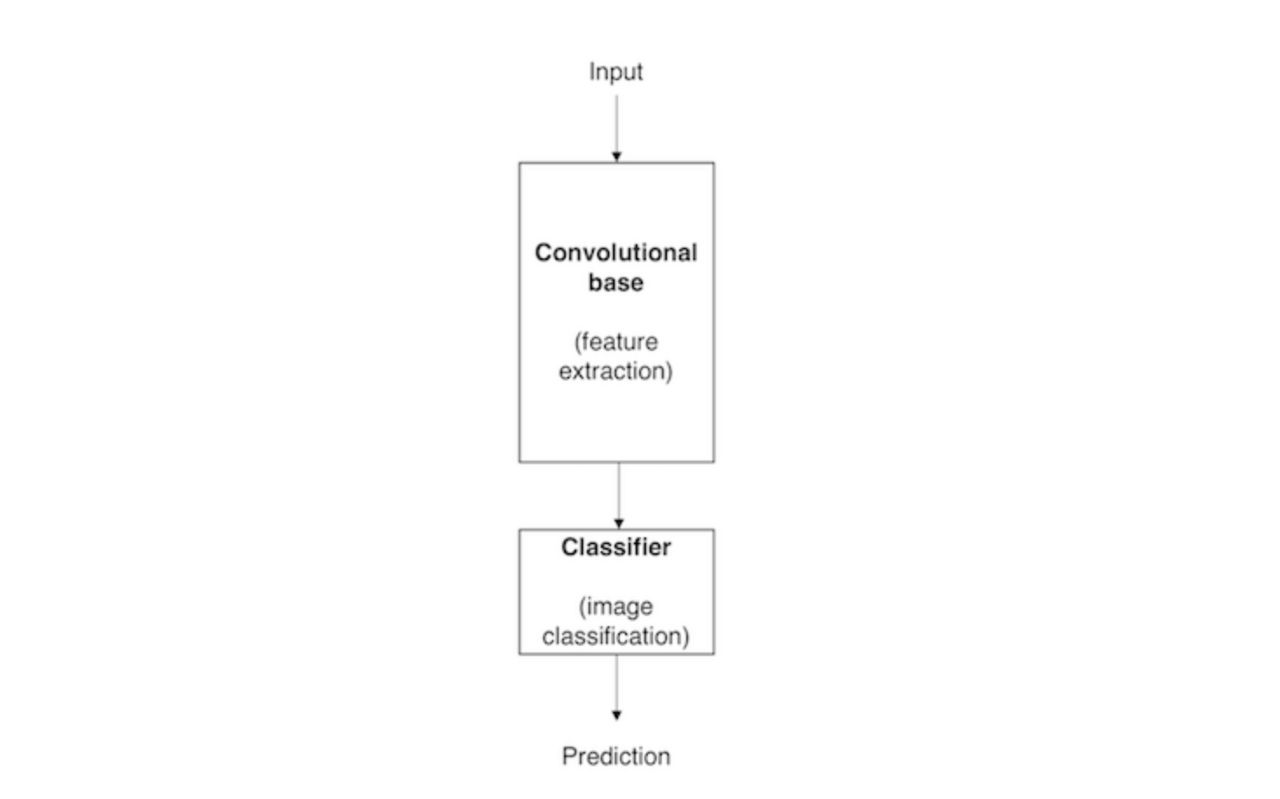


####결론적으로####
**Convolutional Base의 낮은 레벨의 계층(input에 가까운 계층)일수록 일반적인 특징 추출**

*그와 반대로*

**Convolutional Base의 높은 레벨의 계층(output에 가까운 계층)과 Classifier 부분은 보다 구체저깅고 특유한 특징을 추출함**

###3. 사전에 학습된 모델을 내 프로젝트에 맞게 재정의하기

전략 3가지가 있음

- 위의 박스가 Convolutional Base
- 밑의 박스가 Classifier
- Frozen : 고정, Trained : 새로 학습하기
- 전략1 : 컴퓨터 성능 좋고 데이터셋 사이즈가 클때
- 전략3 : 컴퓨터 성능 좋지 않거나 데이터셋 사이즈가 작을때

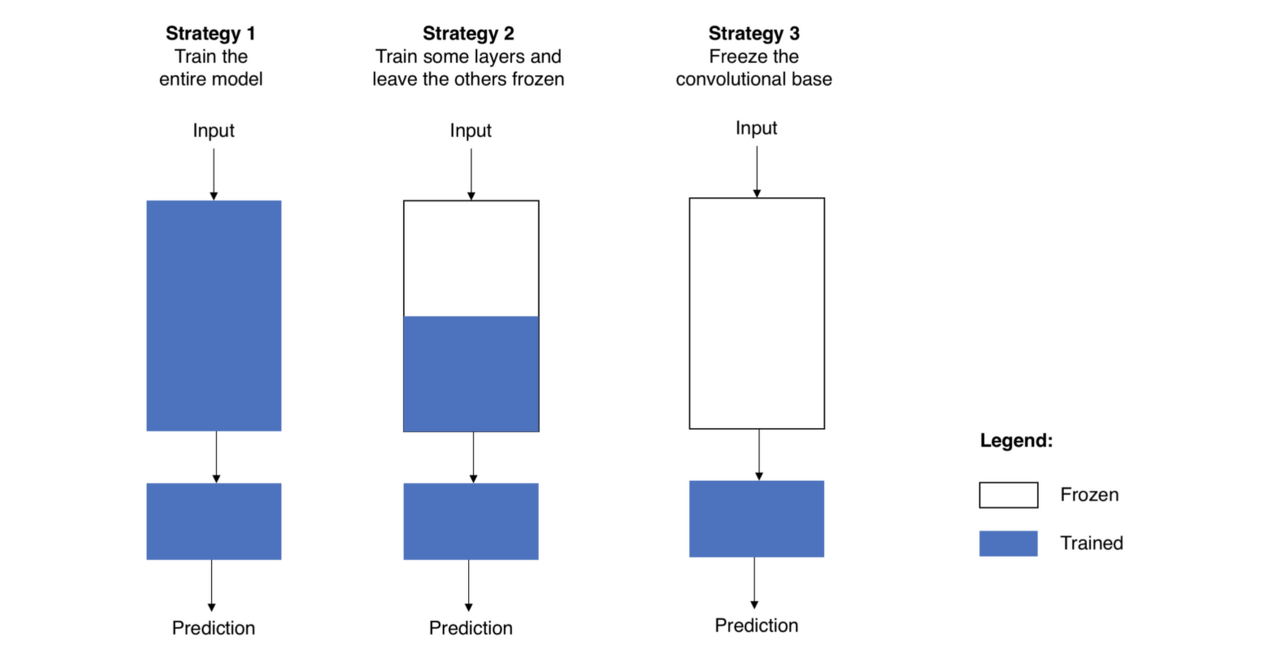

###4. 전이학습의 전체 과정
1) 사전학습 모델 선택

2) 내 문재가 데이터크기-유사성 그래프에서 어떤 부분에 속하는지 알아보기

3) 내 모델을 Fine-Tuning하기



---



2) 3)
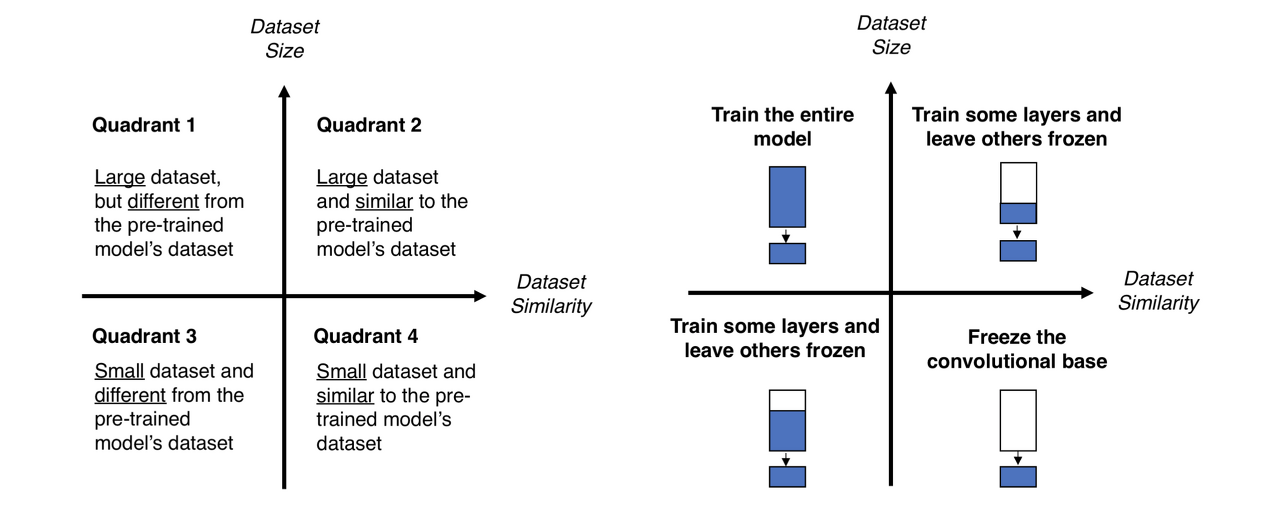

###5. Classifier, 분류기

CNN기반 신경망, 이미지 분류 위한 모델
- Convolutional Base
- Classifier


####분류기로써 활용해볼 수 있는 방법

1) Fully-connected layers, 완전 연결 계층 : 이미지 분류 문제에서 표준으로 쓰이는 방법은 완전 연결 계층을 쌓은 후 마지막에 소프트맥스 활성화함수 계층을 놓는것. 소프트맥스 계층은 주어진 카테고리 각각에 대해 크 카테고리일 확률값을 출력함


2)Global average pooling, 평균 폴링 : Convolutional Base의 끝의 바로 전에 Fully-connected layer대신 평균 폴링계층을 추가하고, 그 결과값을 바로 소프트맥스 계층과 연결하는 방식

3) Line Support Vector Machines, 선형 서포트 벡터 머신 : Convolutional Base에서 추출된 특징을 선형 SVM 분류기로 분류함으로써 정확도를 더 높일 수 있음

###**사전 학습 모델인 VGG16의 구조 확인**

In [2]:
# 라이브러리 import
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# 데이터 가져오기
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name = 'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/4_data/",
    download = True,
    with_info = True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/4_data/cats_vs_dogs/4.0.0.incomplete7IUY6G/…

Dataset cats_vs_dogs downloaded and prepared to /content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/4_data/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [7]:
# 리사이징할 이미지 크기
IMG_SIZE = 160

# 이미지를 같은 포맷으로 통일, 픽셀값의 scale 수정
def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5)-1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

# 원하는 모양의 데이터셋으로 변환
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

# 한 스탭에 학습시킬 데이터의 개수
BATCH_SIZE = 32
# 학습 데이터를 적절히 섞어줄 사이즈
SHUFFLE_BUFFER_SIZE = 1000


# BATCH_SIZE에 따라 데이터를 랜덤으로 뽑아 제공
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

# 하나의 batch를 꺼내 확인
for image_batch, label_batch in train_batches.take(1):
  pass

In [9]:
# 이미지 입력을 받으면 특징 벡터를 추출할 수 있는 모델

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# pre-trained model VGG16으로부터 모델 만들기
base_model = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                        include_top = False,
                                        weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [11]:
image_batch.shape

# 32장의 이미지가 들어있음, 이미지의 크기는 (160,160,3)

TensorShape([32, 160, 160, 3])

In [12]:
feature_batch = base_model(image_batch)
feature_batch.shape

# 이미지의 개수는 32장으로 같지만, 이미지의 사이즈가 달라짐(5로 줄어듬), 채널은 늘어남(512로)
# 특징벡터(이미지에서 특징 추출) 이라고 부름

TensorShape([32, 5, 5, 512])

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

위의 코드에서 Dense가 빠진 이유는

우리가 전이학습(Transfer Learning)을 수행하여 새로 학습시킬 것이기 때문(전략 3)

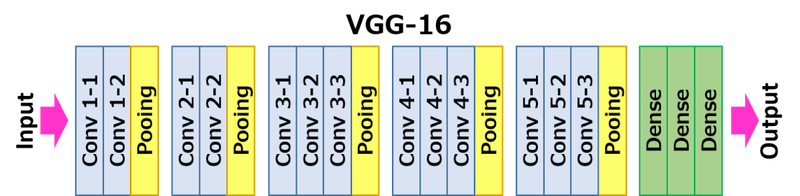

VGG16모델(특징 벡터 추출)의 구조

###**VGG16 끝단에 Classifier 레이어를 붙여서 원하는 구조의 분류 모델 만들기**

- 직전까지 모델의 벡터 사이즈는 (5,5,512)로 3차원이다.
- Classifier를 구성하려면 3차원을 1차원으로 바꿔야함 **Flatten() 사용!**
- 다른 방법은 **Global Average Pooling*(Depth는 그대로 보존됨), (1,1,Depth)**
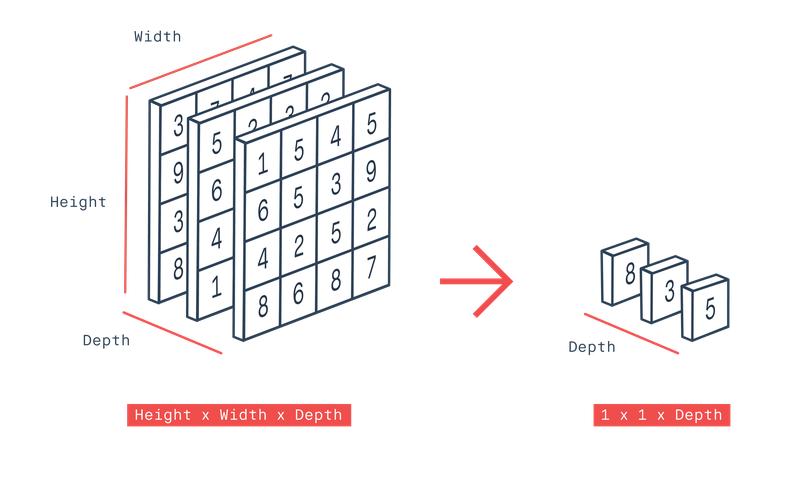


In [14]:
# Global Average Pooling 계층 만들기
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

슝~


In [15]:
# global_average_layer위에 VGG16이 출력했던 feature_batch 입력
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [16]:
# Dense 레이어 붙이기 : Classifier 완성
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 2)


In [18]:
# VGG16에 해당하는 base_model은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 trainable 변수를 False로 지정하기
base_model.trainable = False
print("슝~")

슝~


In [19]:
# 최종 모델
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    dense_layer,
    prediction_layer
])
print("슝~")

슝~


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________
